# Homework5: Normalizing flows

## Task 1: Theory (5pt)

### Problem 1: Sylvester flow (2.5pt)

At the Seminar 6, we have studied planar flows of the form:
$$
    \mathbf{x} = g(\mathbf{z}, \boldsymbol{\theta}) = \mathbf{z} + \mathbf{u} h(\mathbf{w}^T\mathbf{z} + b),
$$
where $\mathbf{u} \in \mathbb{R}^m$,  $\mathbf{w} \in \mathbb{R}^m$, $b \in \mathbb{R}$.

There is a natural generalization of planar flows of the form:
$$
   \mathbf{x} = g(\mathbf{z}, \boldsymbol{\theta}) = \mathbf{z} + \mathbf{V} h(\mathbf{W}^T\mathbf{z} + \mathbf{b}),
$$
where $\boldsymbol{\theta} = \{\mathbf{V}, \mathbf{W}, \mathbf{b}\}$, $\mathbf{V} \in \mathbb{R}^{m \times k}$,  $\mathbf{W} \in \mathbb{R}^{m \times k}$, $\mathbf{b} \in \mathbb{R}^k$, $h : \mathbb{R}^k \rightarrow \mathbb{R}$ is nonlinear function, which applied pointwise to the elements of the vector $\mathbf{W}^T\mathbf{z} + \mathbf{b}$. This flow is called [Sylvester flow](https://arxiv.org/abs/1803.05649).

1) Prove a simplified version of the matrix-determinant lemma:
$$
    \det (\mathbf{I}_m + \mathbf{V} \mathbf{W}^T) = \det (\mathbf{I}_k + \mathbf{W}^T \mathbf{V}).
$$
2) Calculate the determinant of the Jacobi matrix for the Sylvester flow  and apply the lemma proved in the previous paragraph to it.

3) In order to reduce the complexity for the determinant calculation (and ensure the invertibility of the transform $g(\mathbf{z}, \boldsymbol{\theta})$), the authors proposed to parametrize the matrices $\mathbf{V}$ and $\mathbf{W}$ as follows:
$$
    \mathbf{V} = \mathbf{Q} \mathbf{U}; \quad \mathbf{W} = \mathbf{Q} \mathbf{L},
$$
where $\mathbf{Q} \in \mathbb{R}^{m \times k}$ — orthogonal matrix ($\mathbf{Q}^T \mathbf{Q} = \mathbf{I}$), $\mathbf{U} \in \mathbb{R}^{k \times k}$ — upper triangular matrix, $\mathbf{L} \in \mathbb{R}^{k \times k}$ — lower triangular matrix ([wiki](https://en.wikipedia.org/wiki/Triangular_matrix)). Write out an expression for the Jacobian determinant using this parametrization.

4) Calculate and compare the complexity for calculating the determinant of the Jacobi matrix 
   * before applying the lemma; 
   * after applying the lemma;
   * after applying the $\mathbf{Q} \mathbf{U}$, $\mathbf{Q} \mathbf{L}$ parametrization.

5) Which conditions should be imposed on the matrices $\mathbf{U}$ , $\mathbf{L}$ and nonlinearity $h$ in order to guarantee the invertibility of the transform $g$. 

   **Hint**: What conditions guarantee non-degeneracy of the determinant of the jacobian $\det \mathbf{J}_g$? Recall the planar flows case ($k = 1$) that was considered at Seminar 6.

1) Let use next **Theorem**:

**Theorem 1.** Let $A$ - is invertible matrix, then:
$$
\det\begin{pmatrix}
A & B \\
C & D
\end{pmatrix} = \det(A)\det(D+CA^{-1}B)
$$
Now just use the Theorem. Let $A = I_m$, $B = V$, $C = W^T$, $D = I_k$:
$$
\det\begin{pmatrix}
I_m & V \\
W^T & I_k
\end{pmatrix} = \det(I_m)\det(I_k+W^TI_m^{-1}V)=\det(I_k+W^TV)
$$

Because $\det(A)=\det(A^T)$, then:

$$
\det\begin{pmatrix}
I_m & V \\
W^T & I_k
\end{pmatrix} 
=
\det\begin{pmatrix}
I_m & W^T \\
V & I_k
\end{pmatrix}^T = \det(I_k)\det(I_m+W^TI_k^{-1}V)=\det(I_m+VW^T)
$$

From that follow:
$$
\det(I_m+VW^T) = \det(I_k+W^TV) 
$$

2)

$$
h(t) = 
\begin{pmatrix}h_1(t_1) & ... & h_n(t_n) \end{pmatrix}^T,
$$
Then:
$$
\frac{\partial h}{\partial t} = \sum_{i=1}^{k} \sum_{j=1}^{k} \frac{\partial h_i}{\partial t_{j}}; \\
\frac{\partial h_i}{\partial t_{j}} = 0, i \neq j.
$$
Therefore:
$$
\frac{\partial h}{\partial t} = 
\begin{pmatrix}
\frac{\partial h_1}{\partial t_{1}} & 0 & 0 & ... & 0 \\
0 & \frac{\partial h_2}{\partial t_{2}} & 0 & ... & 0 \\
0 & 0 & \frac{\partial h_3}{\partial t_{3}} & ... & 0 \\
...\\
0 & 0 & 0 & ... & \frac{\partial h_i}{\partial t_{k}} \\
\end{pmatrix}
=
diag(h'(t))
$$
Then the matrix of Jacobi, should have view:
$$
J_g = I_k + Vdiag(h'(W^Tz+b))W^T
$$
Let compute Jacobian of this equality, with using matrix-determinant lemma:
$$
\det\bigg(I_k+Vdiag\bigg[h'(W^Tz+b)\bigg]W^T\bigg) = 
\det\bigg(I_m+diag\bigg[h'(W^Tz+b)\bigg]W^TV\bigg)
$$


3)
Let $V = QU$, $W = QL$ and remember, that if $U$ - it is upper triangular matrix, then $\det U = \prod_{i=1}^ku_{i,i}$, where $u_{i,i}$ are elements on main diagonal and same with $\det L = \prod_{i=1}^kl_{i,i}$
Then our Jacobian is equal:
$$
\det\bigg(I_m+diag\bigg[h'(W^Tz+b)\bigg]W^TV\bigg) = 
\det\bigg(I_m+diag\bigg[h'(W^Tz+b)\bigg](QL)^T(QU)\bigg) =
\det\bigg(I_m+diag\bigg[h'(W^Tz+b)\bigg]L^TQ^TQU\bigg) =
\det\bigg(I_m+diag\bigg[h'(W^Tz+b)\bigg]L^TU\bigg)  
$$
In the statement expression $L^T$ - is upper triangular matrix. And multiplication of 2 upper triangular matrices - is upper triangular matrix. Let we note $P = L^T U$, where $P$ - upper triangular matrix, then:
$$
\det J_g = \det\bigg(I_m+diag\bigg[h'(W^Tz+b)\bigg]P\bigg)
$$

4)
* Before applying lemma, whe should be compute determinant of matrix $k×k$, and computational complexity is equal to $O(k^3)$
* After apply lemma we have complexity which equal to $O(m^3)$ If m less then k, that we win of this situation)

In the 3 point the elements of main diagonal in matrix $P$ expression  $p_{i,i} = u_{i,i}l_{i,i}$. To compute this elements our need $k$ operations. 
Therefore elements of main diagonal after $diag\bigg[h'(W^Tz+b)\bigg]P$ are equal to $(h_i)'u_{i,i}l_{i,i}$
And elements on main diagonal in matrix $J_п$ should are equal to $1+(h_i)'u_{i,i}l_{i,i}$. Therefore:
$$
\det J_g = \prod_{i=1}^m(1+(h_i)'u_{i,i}l_{i,i})
$$
We need  $O(m)$ operations for compute determinant **(if we aren't take  complexity computation of expression $W^Tz+b$ and h'(W^Tz+b))**. And it's beautiful (:

5) Order to guarantee the invertibility of the transform $g$, we should have non-degeneracy of the determinant of the jacobian. From our computations($i=\overline{1,m})$:

$$
\det J_g = \prod_{i=1}^m(1+(h_i)'u_{i,i}l_{i,i}) >  1\\
1+(h_i)'u_{i,i}l_{i,i}>0\\
u_{i,i}l_{i,i}>-1 \\
u_{i,i}l_{i,i}>-1/(h_i)'
$$
Therefore to guarantee the invertibility of the transform $g$ should be imposed next conditions: 
$$u_{i,i}l_{i,i}>-1/(h_i)'
$$


```your solution```

### Problem 2: Expressivity of normalizing flows (2.5pt)

Let $\pi(\mathbf{x})$ is an absolutely continuous probability distribution supported everywhere on $\mathbb{R}^m$ (i.e. $\pi(\mathbf{x}) > 0$ for all $\mathbf{x} \in \mathbb{R}^m$). Additionally we suppose, that the pdf $\pi(\mathbf{x})$ is continuously differentiable on  $\mathbb{R}^m$.  Our ultimate goal is to show, that there exists diffeomorphism (invertible continuously differentiable map): 
$$ 
    \mathbf{u} = F(\mathbf{x}) \quad F : \mathbb{R}^m \rightarrow \mathbb{U}.
$$
Here $\mathbb{U} = [0, 1]^m$ is a hypercube, which turns $\pi(\mathbf{x})$ into uniform distribution $p(\mathbf{u}) = U[0, 1]^m$ on the hypercube $\mathbb{U}$ ($p(\mathbf{u}) = 1 \,,\, \mathbf{u} \in \mathbb{U}$). Here we have to think about openness and closeness of $\mathbb{U}$ for formal math correctness, but we omit it in this task. <sub><sup><i>Math correctness comment</i>: Strictly speaking, the diffeomorphism $F$ maps $\mathbb{R}^m$ to the open cube $\text{int}\left(\mathbb{U}\right) = (0, 1)^m$, sinse the reverse mapping $F^{-1} : \text{int}\left(\mathbb{U}\right) \rightarrow \mathbb{R}^m$ is continuous $\Rightarrow$ the preimage of the open set $\mathbb{R}^m$ with respect to $F^{-1}$ should be <b>open</b>: $(F^{-1})^{-1}(\mathbb{R}^m) = F(\mathbb{R}^m) = \text{an open set}$</sup></sub>

If such function exists, it means that **there exists normalizing flow model from base uniform distribution to any(!) target distribution.**

---------

1. Consider the autoregressive decomposition of $\pi(\mathbf{x})$:

    $$\pi(\mathbf{x}) = \prod\limits_{j = 1}^{m} \pi(x_j|\mathbf{x}_{1:j - 1}).$$

2. Treat each component $\pi(x_j|\mathbf{x}_{1:j - 1})$ in the decomposition above separately. Consider the transformations:

$$\mathbf{x} \rightarrow u_j = F_j(x_j, \mathbf{x}_{1:j - 1}) = \int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j'.
$$

   Here $F_j(x_j, \mathbf{x}_{1:j - 1})$ is the cumulative distribution function of $j$-th conditional $x_j$ (given $\mathbf{x}_{1:j - 1}$) Note, that $u_j \in [0, 1]$.

3. Define the transform $F : \mathbb{R}^m \rightarrow \mathbb{U}$ as follows:

$$\mathbf{x} \rightarrow \mathbf{u} = \begin{bmatrix} F_1(x_1) \\ F_2(x_2,x_1) \\ \dots \\ F_m(x_m, \mathbf{x}_{1:m-1})\end{bmatrix}.
$$
    
Given the properties of $\pi$ ($\pi(\mathbf{x}) > 0$ and continuously differentiable) it is easy to show, that $F$ is continuously differentiable. We omit the details since they are just boring mathematical calculations.

**Subproblem 2.1 (0.5pt):** Prove, that the function $F : \mathbb{R}^m \rightarrow \mathbb{U}$ is invertible. <sub><sup><i>Math correctness comment</i>: Strictly speaking, $F : \mathbb{R}^m \rightarrow \text{int}\left(\mathbb{U}\right)$ is invertible</sup></sub>

**Subproblem 2.2 (1pt):** Prove, that $\det \mathbf{J}_F (\mathbf{x}) = \pi(x)$.

**Subproblem 2.3 (1pt):** Prove, that $\mathbf{u}$ is a uniformly distributed ($p(\mathbf{u}) = U[0,1]^m)$.
    
**Subproblem 2.4\* (extra 1pt):** Let $\pi(\mathbf{x})$ and $\mu(\mathbf{y})$ are absolutely continuous probability distributions supported everywhere on $\mathbb{R}^m$, whose pdfs are continuously differentiable. Prove that there exists a diffeomorphism $G : \mathbb{R}^m \rightarrow \mathbb{R}^m$ which turns $\pi$ into $\mu$, i.e.:

$$\mathbf{y} = G(\mathbf{x}), \quad \text{where } \mathbf{x} \sim \pi(\mathbf{x}), \, \mathbf{y} \sim \mu(\mathbf{y}).
$$

**Subproblem 2.1**
Let see on expression:
$$
u_j = F_j(x_j, \mathbf{x}_{1:j - 1}) = \int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j'.
$$
Since in the right part of equality we have integral and $\pi(x) > 0$ and  if $x^{1}_j<x^{2}_j$ then:
$$
\int\limits_{- \infty}^{x^{1}_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j' < \int\limits_{- \infty}^{x^{2}_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j'
$$
Therefore $F_j(x_j, \mathbf{x}_{1:j - 1})$ is **monotonically increasing function**. And from it follow that for each $F_j(x_j, \mathbf{x}_{1:j - 1}) = u_j$ exist  $F^{-1}_j(u_j)  = x_j$, and it work for each coordinate of image $u_i$, therefore all image is inversible:

$$F^{-1}(u):  
\mathbf{u} \rightarrow \mathbf{x} = 
\begin{bmatrix} 
F^{-1}_1(u_1) \\ 
F^{-1}_2(u_2) \\ 
\dots \\ 
F^{-1}_m(u_m)
\end{bmatrix}.
$$


**Subproblem 2.2**
Remember the definition of matrix Jacobian matrix:
$$
J_F=
\left[\begin{array}{ccc}
\dfrac{\partial f_{1}(\mathbf{x})}{\partial x_{1}} & \cdots & \dfrac{\partial f_{1}(\mathbf{x})}{\partial x_{m}} \\
\vdots & \ddots & \vdots \\
\dfrac{\partial f_{m}(\mathbf{x})}{\partial x_{1}} & \cdots & \dfrac{\partial f_{m}(\mathbf{x})}{\partial x_{m}}
\end{array}\right]
$$
In our case $f_j = F_j(x_j, \mathbf{x}_{1:j - 1}) $. Each  $F_j$ depends only of $x_j$, hence if $i\neq j$  then  $ \dfrac{\partial f_{i}(\mathbf{x})}{\partial x_{j}} = 0$.

Now we should compute $ \dfrac{\partial f_{i}(\mathbf{x})}{\partial x_{i}}$. For that, rememeber property of CDF $F(x_1, \dots , x_m)$:
$$
\lim_{\mathbf{x_i}\to-\infty} F(x_1, x_2, \dots, \mathbf{x_i}, \dots, x_m)=0
$$
It need compute derevative of function $\int\limits_{- \infty}^{x_j} \pi(x_j'|\mathbf{x}_{1:j - 1}) d x_j$ by anology of function with variable upper limit:
$$ 
\dfrac{\partial f_{i}(\mathbf{x})}{\partial x_{i}} = \pi(x_j|\mathbf{x}_{1:j - 1})
$$
Hence Jacobian matrix looks:
$$
\left[\begin{array}{ccc}
\pi(x_1) & \cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots &  \pi(x_m|\mathbf{x}_{1:m - 1})
\end{array}\right]
$$
Hence determinant equal:
$$
\det J_F = \prod_{i=1}^m \pi(x_m|\mathbf{x}_{1:m - 1}) = \pi(x)
$$
Even if $F_j$ depends of $x_k$, over all $k \leq k$, then $J_F$ be upper triangular matrix and $\det J_F = \pi(x)$



**Subproblem 2.3**
Let show that each $u_i$ have uniformly distribution, that is , it has a density:

$$
\begin{equation*}
p(u_i) = 
 \begin{cases}
   1 & u_i \in [0, 1]\\
   0 & u_j \notin [0, 1]
 \end{cases}
\end{equation*}
.
$$
Since $\int\limits_{- \infty}^{x_i} \pi(x_j'|\mathbf{x}_{1:i - 1}) d x_i' \in [0, 1]$, then $u_i \in [0, 1]$

Use next property of distributions, in order get probability $u_i$. If we have $x \sim p(x)$, that if $u=f(x)$ where f(x) - is monotonically function with $x=ψ(u)=f^{-1}(u)$, that $u$ have distribution $g(u)$:
$$
g(u) = |ψ(u)|p(ψ(u)).
$$
How we proof for $F_i(x_i)$ exist inverse function $F^{-1}(u_i)=x_i$. $x_i$ has probability $\pi(x_i|\mathbf{x}_{1:i - 1})$. Now we need find $(F^{-1})'(u_i)$. Let use theorem about derevative of inverse function:
$$
(F^{-1})'(u_i) = \frac{1}{F'(x_i(u_i))}=\frac{1}{F'(x_i)}=\frac{1}{\pi(x_i|\mathbf{x}_{1:i - 1})}.
$$
Then probability density $u_i$:
$$
g(u_i) = \frac{1}{\pi(x_i|\mathbf{x}_{1:i - 1})} p(F^{-1}(u_i)) = \frac{p(x_i)}{\pi(x_i|\mathbf{x}_{1:i - 1})}=\frac{\pi(x_i|\mathbf{x}_{1:i - 1})}{\pi(x_i|\mathbf{x}_{1:i - 1})}=1.
$$
and $g(u_i) = 0, u_i \notin [0,1]$
Now we should show, that $p(u)$ is uniformly distribution. Each $x_i$ in this construction independent of another $x_j$, hence $u_i$ independent of $u_j$, then:
$$
p(u)=p(u_1, …,u_m) = p(u_1) …p(u_m)=1…1=1, u \in [0,1]^m \\
p(u)=p(u_1, …,u_m) = p(u_1) …p(u_m) = 0, u \notin [0,1]^m
$$
And how we can see $p(u)$ - uniformly distribution.


**Subproblem 2.4**
$$\mathbf{y} = G(\mathbf{x}), \quad \text{where } \mathbf{x} \sim \pi(\mathbf{x}), \, \mathbf{y} \sim \mu(\mathbf{y}).
$$
From points **2.1-2.3** hence that exist diffeomorphisms: 
$$u=F(x)\\
u=V(y)
$$
Let's express y by u. Since V is a diffeomorphism, then exist:
$$
y=V^{-1}(u).
$$
Then we can express y by x:
$$
y=V^{-1}(u)=V^{-1}(F(x))=G(x).
$$
$V^{-1}$ and $F$ are diffeomorphism  and from theorem, which say that composition of 2 diffeomorphisms is diffeomorphism follow that $V^{-1}(F(x))$ 

```your solution```

In [1]:
REPO_NAME = "2022-2023-DGM-MIPT-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2022-2023-DGM-MIPT-course'...
remote: Enumerating objects: 618, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 618 (delta 36), reused 127 (delta 31), pack-reused 482
Receiving objects: 100% (618/618), 223.63 MiB | 31.64 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Checking out files: 100% (358/358), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./2022-2023-DGM-MIPT-course/homeworks
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0

In [2]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples, visualize_2d_densities
from dgm_utils import show_samples, visualize_images, load_pickle

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 2: RealNVP on 2d data (3pt)

In this task you will implement [RealNVP](https://arxiv.org/abs/1605.08803) model on 2d moons dataset.


The following function generates the data (do not change it).

In [ ]:
def generate_moons_data(count):
    data, labels = make_moons(n_samples=count, noise=0.1)
    data = data.astype('float32')
    split = int(0.8 * count)
    train_data, test_data = data[:split], data[split:]
    train_labels, test_labels = labels[:split], labels[split:]
    return train_data, train_labels, test_data, test_labels

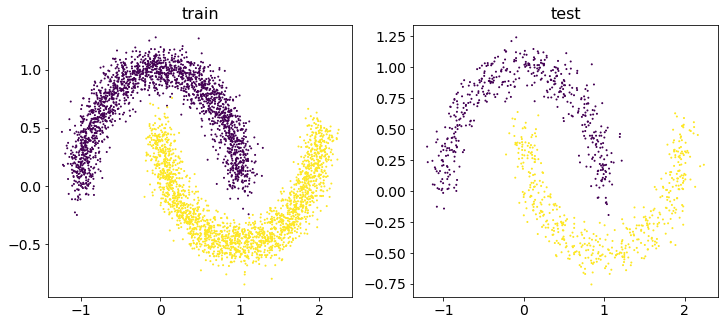

In [ ]:
COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)
visualize_2d_data(train_data, test_data, train_labels, test_labels)

Our model will be a sequence of the affine coupling layers. Note that you have to permute the features that left unchanged between different layers (change order of $\mathbf{x}_1$ and $\mathbf{x}_2$ in the formulas below).

Forward transform:
$$
    \begin{cases}
        \mathbf{y}_1 &= \mathbf{x}_1; \\
        \mathbf{y}_2 &= \mathbf{x}_2 \odot \exp (s(\mathbf{x}_1)) + t(\mathbf{x}_1).
    \end{cases} 
$$

Inverse transform:
$$
    \begin{cases}
        \mathbf{x}_1 &= \mathbf{y}_1; \\
        \mathbf{x}_2 &= (\mathbf{y}_2 - t(\mathbf{y}_1)) \odot \exp ( - s(\mathbf{y}_1)).
    \end{cases} 
$$

Here $s(\cdot)$ and $t(\cdot)$ are outputs of neural network. In this task our networks will be fully connected MLP.

In [ ]:
class FullyConnectedMLP(nn.Module):
    def __init__(self, input_shape, hiddens, output_shape):
        assert isinstance(hiddens, list)
        super().__init__()
        self.input_shape = (input_shape,)
        self.output_shape = (output_shape,)
        self.hiddens = hiddens

        model = []

        # ====
        # your code 
        # Stack Dense layers with ReLU activation.
        # Note that you do not have to add relu after the last dense layer
        input_features = [input_shape] + hiddens + [output_shape]
        n_layers = len(input_features)
        for i in range(1, n_layers):
          layer = nn.Linear(input_features[i-1], input_features[i])
          func_activ = nn.ReLU()
          model.append(layer)
          model.append(func_activ)
        model = model[:-1]
        # ====
        self.net = nn.Sequential(*model)

    def forward(self, x):
        # ====
        # your code
        # apply network that was defined in __init__ and return the output
        x_output = self.net(x) # (bs, output_features)
        return x_output
        # ====

Let define the affine coupling layer.

In [ ]:
class AffineCouplingLayer(nn.Module):
    def __init__(self, parity_type, n_hiddens):
        assert isinstance(parity_type, bool)
        assert isinstance(n_hiddens, list)
        super().__init__()
        self.mask = self.build_mask(parity_type=parity_type)
        self.mlp = FullyConnectedMLP(input_shape=2, hiddens=n_hiddens, output_shape=2)

    def build_mask(self, parity_type):
        # ====
        # your code
        # the mask is extremely simple
        # it is a float tensor of two scalars (1.0 and 0.0)
        # the partition_type defines the order of these two scalars
        if parity_type:
          mask = torch.tensor([1, 0])
        else:
          mask = torch.tensor([0, 1])
        return mask
        # ====

    def forward(self, x, invert=False):# (bs, 2)
        # ====
        # your code
        # 1) mask our input x, using self.mask
        # 2) apply mlp to masked input to get s and t 
        self.mask = self.mask.to(x.device)
        x_masked = x * self.mask
        x_mlp = self.mlp(x_masked)
        t = x_mlp[:, 0].unsqueeze(1)
        s = x_mlp[:, 1].unsqueeze(1)
        # ====

        # we invert mask here
        t = t * (1.0 - self.mask) # (bs, 2)
        s = s * (1.0 - self.mask) # (bs, 2)

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform (invert=False)
        if invert:
          x = (x - t) * (-s).exp()
          s = -s
        else:
          x = (x*s.exp() + t)

        # ====

        # the output is transformed input 
        # and logarithm of jacobian (which equals to s)
        return x, s
        

def test_affine_coupling_layer():
    x = torch.zeros((4, 2), dtype=torch.float32)

    layer = AffineCouplingLayer(parity_type=True, n_hiddens=[4, 4])
    mask = np.array([1, 0], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (4, 2)
    assert tuple(out2.size()) == (4, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((2, 2)))

    layer = AffineCouplingLayer(parity_type=False, n_hiddens=[4, 4])
    mask = np.array([[0, 1]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (4, 2)
    assert tuple(out2.size()) == (4, 2)

    assert np.allclose(out1.cpu().detach().numpy() * mask, np.zeros((4, 2)))

test_affine_coupling_layer()

We are ready to define RealNVP model. The model objective is the negative value of log-likelihood. Log-likelihood is given by the change of variables (CoV) theorem:
$$
	\log p(\mathbf{x}| \boldsymbol{\theta}) = \log p(\mathbf{z}) + \log \left|\det \left(  \frac{\partial \mathbf{z}}{\partial \mathbf{x}} \right) \right| = \log p(f(\mathbf{x}, \boldsymbol{\theta})) + \log \left|\det \left( \frac{\partial f(\mathbf{x}, \boldsymbol{\theta})}{\partial \mathbf{x}} \right) \right|.
$$

In [ ]:
from torch.distributions.normal import Normal
from torch.distributions.multivariate_normal import MultivariateNormal

In [ ]:
bs, l = 4, 2
a = torch.tensor((bs, l))
loc = torch.zeros(2)
scale = torch.eye(2)
mn = MultivariateNormal(loc, scale)

a = torch.tensor([[1, 2],
                  [3, 4]])

mn.log_prob(a)

tensor([ -4.3379, -14.3379])

In [ ]:
class RealNVP(nn.Module):
    def __init__(self):
        super().__init__()

        # base distribution p(z) is normal
        self.prior = torch.distributions.Normal(torch.tensor(0.), torch.tensor(1.))
        # ====
        # your code
        # apply sequence of AffineCouplingLayer with alternating parity_type
        # 6 layers is sufficient (with 2 hidden layers in each affine layer)
        model = []
        parity_type = False
        self.n_layers = 6
        for i in range(self.n_layers):
          afl = AffineCouplingLayer(parity_type, [128, 128])
          model.append(afl)
          parity_type = not parity_type
        
        self.net = nn.Sequential(*model)
        # ====
        
    def forward(self, x, invert=False):
        loc = torch.zeros(2).to(x.device)
        scale = torch.eye(2).to(x.device)
        self.normal = MultivariateNormal(loc, scale)

        z = x
        log_det = 0

        # ====
        # your code
        # apply sequence of transforms and sum all of log_dets
        # if invert == True, you have to apply transforms in reversed order (from last to first!) with invert=True flag
        if invert:
          for i in range(self.n_layers - 1, 0, -1):
            x, log_det_afl = self.net[i](z, invert = True)
            z = x
            log_det += log_det_afl
            
        else:
          for afl in self.net:
            x, log_det_afl = afl(z)
            z = x
            log_det += log_det_afl
        
        # ====
        return z, log_det

    def log_prob(self, x):
        # ====
        # your code
        # 1) make forward pass with right inverse flag
        # 2) sum log_det with log of base distribution (log p(z)) - see the formula above
        # 3) we will get tensor of shape [batch_size, 2] - sum it over the the last dimension
        z, log_det = self(x, invert = False)
        log_pz = self.normal.log_prob(z).to(z.device)
        log_det = log_det.sum(dim = -1)
        log_proba = log_pz + log_det
        return log_proba
        # ====

    def loss(self, x):
        log_prob = self.log_prob(x)
        # log_prob should be a vector of batch_size
        assert len(log_prob.shape) == 1
        return {'nll_loss': - log_prob.mean()}

    def sample(self, n):
        # ====
        # your code
        # 1) sample from the prior
        # 2) apply the forward pass with the right inverse flag
        # 3) return only the first output of the forward pass (the second is the log of determinant - we don't need it in sampling)
        device = next(self.parameters()).device
        loc = torch.zeros(2).to(device)
        scale = torch.eye(2).to(device)
        self.normal = MultivariateNormal(loc, scale)
        z = self.normal.sample_n(n)
        x, _ = self(z, invert = True)
        return x
        # ====

It is time to train our model.

  0%|          | 0/50 [00:00<?, ?it/s]

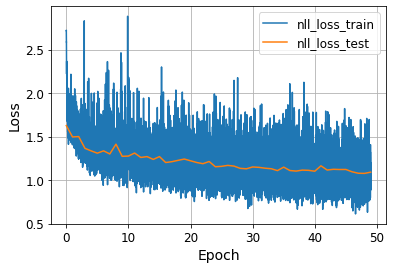

In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE =  16# any adequate value
EPOCHS =      50# < 100
LR =          1e-4# < 1e-2
# ====

COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)

loader_args = dict(batch_size=BATCH_SIZE, shuffle=True)
train_loader = data.DataLoader(train_data, **loader_args)
test_loader = data.DataLoader(test_data, **loader_args)

# model
model = RealNVP()

# train
train_losses, test_losses = train_model(
    model, train_loader, test_loader, epochs=EPOCHS, lr=LR, loss_key='nll_loss', use_cuda=USE_CUDA, use_tqdm=True
)
plot_training_curves(train_losses, test_losses)

Let check visually that our model is correct.

Here we visualize:
* samples $\mathbf{x}$ from $p(\mathbf{x})$ - you have to get moons;
* the density $p(\mathbf{x})$ - you have to get moons;
* the points $\mathbf{z}$ from prior distribution $p(\mathbf{z})$ - it should be similar to standard normal.

/usr/local/lib/python3.8/dist-packages/torch/distributions/distribution.py:166: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


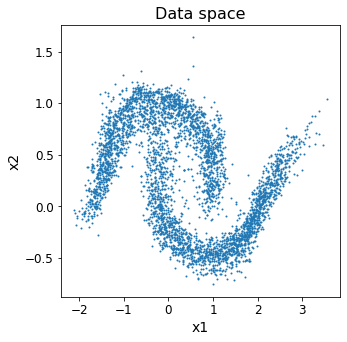

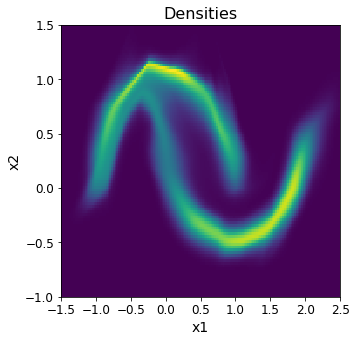

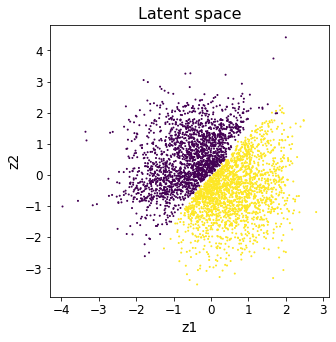

In [ ]:
# Samples

x_samples = model.sample( 4000).cpu().detach().numpy()
visualize_2d_samples(x_samples, title='Data space', xlabel='x1', ylabel='x2')

# Density
dx, dy = 0.025, 0.025
x_lim = (-1.5, 2.5)
y_lim = (-1, 1.5)
y, x = np.mgrid[slice(y_lim[0], y_lim[1] + dy, dy),
                slice(x_lim[0], x_lim[1] + dx, dx)]
mesh_xs = torch.FloatTensor(np.stack([x, y], axis=2).reshape(-1, 2))

if USE_CUDA:
    mesh_xs = mesh_xs.cuda()

densities = np.exp(model.log_prob(mesh_xs).cpu().detach().numpy())

# Latents
train_tensor = torch.FloatTensor(train_data)
if USE_CUDA:
    train_tensor = train_tensor.cuda()
z = model(train_tensor)[0]
latents = z.cpu().detach().numpy()

visualize_2d_densities(x, y, densities, title='Densities', xlabel='x1', ylabel='x2')
visualize_2d_samples(latents, title='Latent space', labels=train_labels, xlabel='z1', ylabel='z2')

## Task 3: RealNVP on MNIST (5pt)

In this task you will implement the [RealNVP](https://arxiv.org/abs/1605.08803) for MNIST dataset. 

Download the data from [here](https://drive.google.com/file/d/1eTH_3i6yShm5yQikO0KdDEG3Hue9lNoZ/view?usp=sharing) (you could use the cell below).

In [15]:
!gdown --id 1eTH_3i6yShm5yQikO0KdDEG3Hue9lNoZ

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eTH_3i6yShm5yQikO0KdDEG3Hue9lNoZ
To: /content/mnist.pkl
100% 55.4M/55.4M [00:00<00:00, 256MB/s]


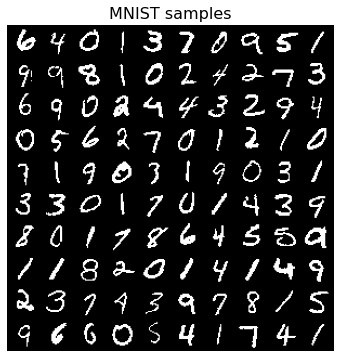

In [16]:
train_data, test_data = load_pickle('/content/mnist.pkl', flatten=False, binarize=True)
visualize_images(train_data, 'MNIST samples')

Please note that our data is discrete, and, moreover, it is binary. 

In [ ]:
np.unique(train_data)

array([0., 1.], dtype=float32)

In this task for the neural networks $s(\cdot)$ and $t(\cdot)$ we will use the ResNet-like network. The model will consist stack of Residual blocks:
$$
    \mathbf{y} = \mathbf{x} + f(\mathbf{x}).
$$

In [7]:
class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(dim, dim, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=1)
        )

    def forward(self, x):
        return x + self.block(x)


class SimpleResnet(nn.Module):
    def __init__(self, in_channels, out_channels, n_filters, n_blocks):
        super().__init__()
        layers = [
            nn.Conv2d(in_channels, n_filters, kernel_size=3, padding=1),
            nn.ReLU()
        ]
        for _ in range(n_blocks):
            layers.append(ResnetBlock(n_filters))
        layers.extend([
            nn.ReLU(),
            nn.Conv2d(n_filters, out_channels, kernel_size=3, padding=1)
        ])
        self.resnet = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)

We have to implement coupling layer for images. To split image in two parts we will you checkerboard and chanelwise splitting (see image below).

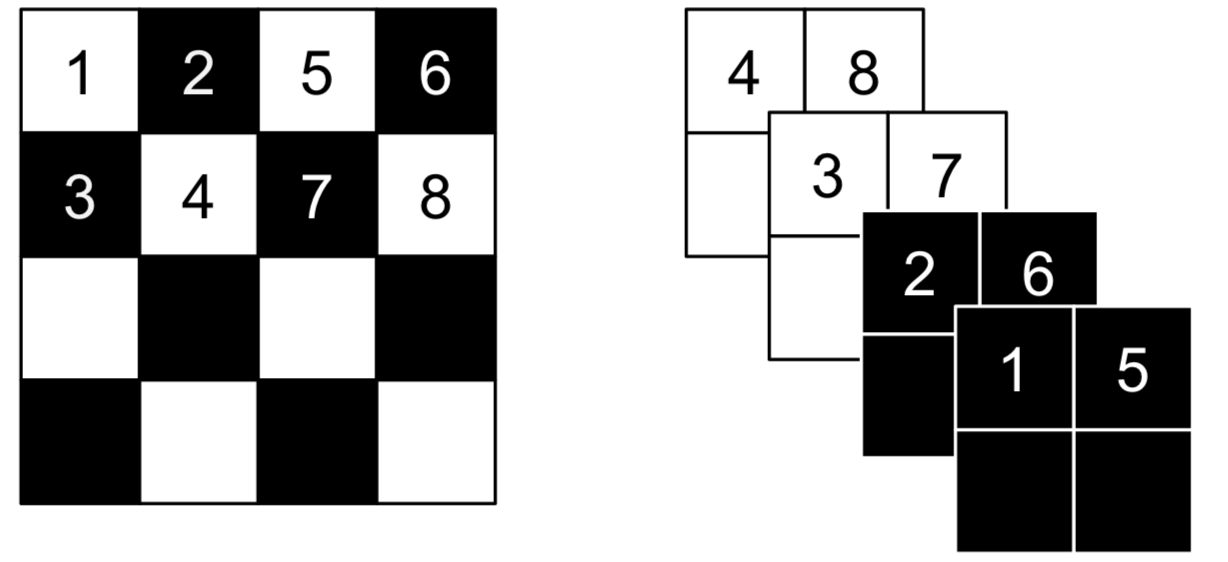

Firstly, let implement checkerboard splitting.

In [8]:
class AffineCheckerboardCouplingLayer(nn.Module):
    def __init__(self, parity_type, input_shape, in_channels=3, n_filters=32, n_blocks=4):
        assert isinstance(parity_type, bool)
        super().__init__()
        self.input_shape = input_shape
        self.parity_type = parity_type
        self.mask = self.build_mask()
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.in_channels = in_channels

        # ====
        # your code
        # define resnet that will output s() and t()
        self.net = SimpleResnet(in_channels, 2*in_channels, n_filters, n_blocks)
        
        # ====

    def build_mask(self):
        # ====
        # your code
        # return checkerboard mask
        # if parity_type == True, the top left corner will be 1.0
        # if parity_type == False, the top left corner will be 0.0
        helped_array = np.indices((1, 1, *self.input_shape)).sum(axis=0)
        mask = self.parity_type * (1 - helped_array % 2) + helped_array % 2 * (not self.parity_type)
        # ====
        assert mask.shape[1:] == (1, *self.input_shape)
        return torch.tensor(mask.astype('float32')).cuda()

    def forward(self, x, invert=False):
        batch_size = x.shape[0]
        n_channels = x.shape[1]
        mask = self.mask.repeat(batch_size, 1, 1, 1)

        # ====
        # your code
        # 1) mask tensor x
        # 2) apply resnet to masked x
        # 3) split resnet output to get s and t
        masked_x = mask * x
        output_params = self.net(masked_x)
        s = output_params[:, :self.in_channels, :, :]
        t = output_params[:, self.in_channels:, :, :]
        # ====
        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        t = t * (1.0 - mask)
        s = s * (1.0 - mask)

        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform
        if invert:
          x = (x - t) * (-s).exp()
          s = -s
        else:
          x = (x*s.exp() + t)
        # ====
        return x, s
        
        
def test_affine_checkerboard_coupling_layer():
    x = torch.zeros((1, 1, 2, 2), dtype=torch.float32).cuda()

    layer = AffineCheckerboardCouplingLayer(parity_type=True, input_shape=(2, 2), in_channels=1, n_filters=4, n_blocks=1).cuda()
    mask = np.array([[1, 0], [0, 1]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 1, 2, 2)
    assert tuple(out2.size()) == (1, 1, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((2, 2)))

    layer = AffineCheckerboardCouplingLayer(parity_type=False, input_shape=(2, 2), in_channels=1, n_filters=4, n_blocks=1).cuda()
    mask = np.array([[0, 1], [1, 0]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 1, 2, 2)
    assert tuple(out2.size()) == (1, 1, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((2, 2)))


test_affine_checkerboard_coupling_layer()

Secodly, let implement channelwise splitting.

In [9]:
class AffineChannelCouplingLayer(nn.Module):
    def __init__(self, parity_type, in_channels=6, n_filters=32, n_blocks=4):
        assert isinstance(parity_type, bool)
        super().__init__()
        self.parity_type = parity_type
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        # ====
        # your code
        # define resnet that will output s() and t()
        self.net = SimpleResnet(in_channels, in_channels*2, n_filters, n_blocks)
        # ====

    def forward(self, x, invert=False):
        n_channels = x.shape[1]
        
        # ====
        # your code
        # 1) split x to two equal parts by channel dimension (dim=1)
        # 2) apply resnet to masked x
        # 3) split resnet output to get s and t
        x1, x2 = torch.chunk(x, 2, dim = 1)
        if self.parity_type:
          z_split = x2
          z = x1
          output_resnet = self.net(z_split)
        else:
          z_split = x1
          z = x2
          output_resnet = self.net(z_split)
        s, t = torch.chunk(output_resnet, 2, dim = 1)
        # ====

        # this formula is described in Section 4.1 in original paper
        # just left it unchanged
        s = self.scale * torch.tanh(s) + self.scale_shift
        
        # ====
        # your code
        # apply forward (invert=False) or inverse (invert=True) transform
        if invert:
          z = (z - t) * (-s).exp()
          s = -s
        else:
          z = z*s.exp()+t
        
        # ====

        # look carefully at this piece of code
        if self.parity_type:
            return torch.cat([z, z_split], dim=1), torch.cat([s, torch.zeros_like(s)], dim=1)
        else:
            return torch.cat([z_split, z], dim=1), torch.cat([torch.zeros_like(s), s], dim=1)


def test_affine_channel_coupling_layer():
    x = torch.zeros((1, 4, 2, 2), dtype=torch.float32).cuda()

    layer = AffineChannelCouplingLayer(parity_type=True, in_channels=2, n_filters=4, n_blocks=1).cuda()
    mask = np.array([[[0, 0], [0, 0]], [[0, 0], [0, 0]], [[1, 1], [1, 1]], [[1, 1], [1, 1]]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 4, 2, 2)
    assert tuple(out2.size()) == (1, 4, 2, 2)
    assert np.allclose(out1.cpu().detach().numpy()[0] * mask, np.zeros((4, 2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((4, 2, 2)))

    layer = AffineChannelCouplingLayer(parity_type=False, in_channels=2, n_filters=4, n_blocks=1).cuda()
    mask = np.array([[[1, 1], [1, 1]], [[1, 1], [1, 1]], [[0, 0], [0, 0]], [[0, 0], [0, 0]]], dtype=np.float32)
    out1, out2 = layer(x)
    assert tuple(out1.size()) == (1, 4, 2, 2)
    assert tuple(out2.size()) == (1, 4, 2, 2)

    assert np.allclose(out1.cpu().detach().numpy()[0, 0] * mask, np.zeros((4, 2, 2)))
    assert np.allclose(out2.cpu().detach().numpy()[0, 0], np.zeros((4, 2, 2)))
    

test_affine_channel_coupling_layer()

We will use the following normalization layer for more stable training. Look carefully at the class below (do not chage it).

In [10]:
class ActNormLayer(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x, invert=False):
        if invert:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = - torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(1, self.n_channels, 1, 1))
                self.initialized = True
                result = x * torch.exp(self.log_scale) + self.shift
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

Our data is discrete and binary. The normalizing flow model works with continuous data (it is a requirement of CoV theorem).

Therefore, we have to convert our discrete data to continuous one. This process is called dequantization. We will address it later in course.

To dequantize the discrete variable $x \in \{0, 1, \dots, K - 1\}$ we add uniform noise to it:
$$
    y = x + u, \quad u \sim \text{Uniform}[0, 1].
$$

Then random variable $y \in [0, K]$ will be continuous and in fact similar to $x$.

Let implement simple function for such dequantization.

In [11]:
def dequantize(x, nbins=256):
    return (x * (nbins - 1) + torch.distributions.Uniform(0.0, 1.0).sample(x.shape).to(x.device)) / nbins


def test_dequantize():
    x = torch.tensor((0, 1, 2, 3)) / 256.0
    y = dequantize(x).cpu().detach().numpy()
    x = x.cpu().detach().numpy()
    assert y.min() >= 0.0
    assert y.max() <= 4 / 256.0
    assert (y[3] > y[2]) and (y[2] > y[1]) and (y[1] > y[0])
    assert (y[3] > x[3]) and (y[2] > x[2]) and (y[1] > x[1]) and (y[0] > x[0])

test_dequantize()

The second issue that we will address here is the boundedness of the image domain. It is more natural for the model to fit the data from the range $(-\infty, +\infty)$. 

The most natural way to convert $(-\infty, +\infty)$ range to the $[0, 1]$ is to apply sigmoid function. But here we need the inverse transform from [0, 1] range (it is normalized dequantized images) to $(-\infty, +\infty)$. So we need to apply inverse sigmoid function. This function is called logit:
$$
    \text{logit}(x) = \log \left( \frac{x}{1 - x} \right) = \log (x) - \log (1 - x).
$$

The last note here is the stability of this transform. To make it stable the common practice is to convert [0, 1] range to the $[\alpha, 1 - \alpha]$ firstly:
$$
    \text{logit}(x) = \log (y) - \log (1 - y), \quad \text{where } y = \alpha + (1 - 2 * \alpha) * x.
$$

Also we need the logarithm of the Jacobian' determinant for this transform. We implement this for you, but we really encourage you to check that the formula in the code is correct for better understanding.

In [12]:
class LogitTransform(nn.Module):
    def __init__(self, alpha=0.05, dequantize=True, nbins=256):
        super().__init__()
        self.alpha = alpha
        self.dequantize = dequantize
        self.nbins = nbins

    def forward(self, x, invert=False):
        if invert:  
            log_det = - x - 2 * F.softplus(-x) - torch.log(torch.tensor(1 - 2 *  self.alpha))
            x = (torch.sigmoid(x) - self.alpha) / (1 - 2 * self.alpha)
        else:
            # dequantization
            if self.dequantize:
                x = dequantize(x, nbins=self.nbins)

            # ====
            # your code
            # 1) scale the data to [alpha, 1 - alpha range] (save the result to x_scaled)
            # 2) apply logit operation that described above (save the result to x)
            x_scaled = self.alpha + (1.0 - 2.0 * self.alpha)*x
            x = torch.log(x_scaled) - torch.log(1.0 - x_scaled)
            # ====

            # look carefully at this expression, try to understand this formula
            log_det = - torch.log(x_scaled) - torch.log(1.0 - x_scaled) + torch.log(torch.tensor(1 - 2 * self.alpha))
        return x, log_det


def test_logit_transform():
    layer = LogitTransform(dequantize=False)
    x = torch.tensor((0, 1, 2, 3)) / 256.0
    z, log_det = layer(x)
    assert np.allclose(z.cpu().detach().numpy(), np.array([-2.944439, -2.8727808, -2.8054335, -2.7418802]))
    assert np.allclose(log_det.cpu().detach().numpy(), np.array([2.9416652, 2.8774219, 2.8175175, 2.7614343]))

    x_restored, log_det2 = layer(z, invert=True)
    assert np.allclose(x.cpu().detach().numpy(), x_restored.cpu().detach().numpy())


test_logit_transform()

Not it is time to define the final model.

The model will consist of several blocks:

1. Logit Transform (to convert the data to $(-\infty, \infty)$ range).
2. Stack of checkerboard coupling layers.
3. Squeeze operation (convert tensor $[B, C, H, W]$ to $[B, 4 * C, H / 2, W / 2]$).
4. Stack of channelwise coupling layers
5. Unsqueeze operation (convert tensor $[B, C, H, W]$ to $[B, C / 4, 2 * H, 2 * W]$).
2. Stack of checkerboard coupling layers.

In [24]:
class RealNVP(nn.Module):
    def __init__(self, input_shape, n_channels, n_filters, n_blocks, nbins=256):
        super().__init__()
        self.input_shape = input_shape
        self.n_channels = n_channels
        self.nbins = nbins

        self.prior = torch.distributions.Normal(torch.tensor(0.).cuda(), torch.tensor(1.).cuda())
        self.logit_transform = LogitTransform(nbins=nbins, dequantize=True)

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        self.n_checkboard = 4
        self.transforms1 = []
        parity_type = False
        for i in range(self.n_checkboard):
         accl = AffineCheckerboardCouplingLayer(parity_type, input_shape, n_channels, n_filters, n_blocks)
         anl = ActNormLayer(n_channels)
         self.transforms1.append(accl)
         self.transforms1.append(anl)
         parity_type = not parity_type
        self.transforms1 = nn.Sequential(*self.transforms1) 
        # ====

        # ====
        # your code
        # define stack of channel coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        self.transforms2 = []
        self.n_channels_cl = 4
        parity_type = False
        for i in range(self.n_channels_cl):
         accl = AffineChannelCouplingLayer(parity_type, 2*n_channels, n_filters, n_blocks)
         anl = ActNormLayer(n_channels)
         self.transforms2.append(accl)
         self.transforms2.append(anl)
         parity_type = not parity_type
        self.transforms2 = nn.Sequential(*self.transforms2) 
        # ====

        # ====
        # your code
        # define stack of checkerboard coupling layers with alternating parity_type
        # add ActNormLayer after each coupling layer
        self.transforms3 = []
        parity_type = False
        for i in range(self.n_checkboard):
         accl = AffineCheckerboardCouplingLayer(parity_type, input_shape, n_channels, n_filters, n_blocks)
         anl = ActNormLayer(n_channels)
         self.transforms3.append(accl)
         self.transforms3.append(anl)
         parity_type = not parity_type
        self.transforms3 = nn.Sequential(*self.transforms3) 
        # ====
        
    def squeeze(self, x):
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def undo_squeeze(self, x):
        # Look carefully at this piece of code (do not change)
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x

    def forward(self, x, invert=False):
        z = x
        log_det = torch.zeros_like(x)
        if invert:
            for op in reversed(self.transforms3):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in reversed(self.transforms2):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in reversed(self.transforms1):
                z, delta_log_det = op.forward(z, invert=True)
                log_det += delta_log_det
            z, delta_log_det = self.logit_transform(z, invert=True)
            log_det += delta_log_det
        else:
            z, delta_log_det = self.logit_transform(z)
            log_det += delta_log_det
            for op in self.transforms1:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.squeeze(z), self.squeeze(log_det)
            for op in self.transforms2:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det
            z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
            for op in self.transforms3:
                z, delta_log_det = op.forward(z)
                log_det += delta_log_det

        return z, log_det

    def log_prob(self, x):
        # ====
        # your code
        # 1) make forward pass with right inverse flag
        # 2) sum log_det with log of base distribution (log p(z))
        # 3) we will get tensor of shape [batch_size, 3, H, W] - sum it over the the last 3 dimensions
        z, log_det = self(x)
        log_proba = self.prior.log_prob(z) + log_det
        log_proba = log_proba.sum((-3, -2, -1)) / (self.input_shape[-1]*self.input_shape[-2])
        return log_proba
        # ====

    def loss(self, x):
        return {'nll_loss': -self.log_prob(x).mean()}

    def sample(self, num_samples):
        # Look carefully at this piece of code (do not change)
        z = self.prior.sample([num_samples, self.n_channels, *self.input_shape])
        samples = self.forward(z, invert=True)[0]
        samples = samples.cpu().detach().numpy()
        samples = np.floor(np.clip(samples * self.nbins, 0.0, self.nbins - 1)) / (self.nbins - 1)
        return samples

Let train this model :)

In our case it took about 30-60 minutes to get appropriate samples.

In [25]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 64# any adequate value
LR =         1e-3# <= 1e-3
EPOCHS =     15# <= 20
N_FILTERS =  64# < 128
N_BLOCKS =   4# < 8
# ====

loader_args = dict(batch_size=BATCH_SIZE, shuffle=True)
train_loader = data.DataLoader(train_data, **loader_args)
test_loader = data.DataLoader(test_data, **loader_args)

# model
model = RealNVP(input_shape=(28, 28), n_channels=1, n_filters=N_FILTERS, n_blocks=N_BLOCKS, nbins=2)


  0%|          | 0/15 [00:00<?, ?it/s]

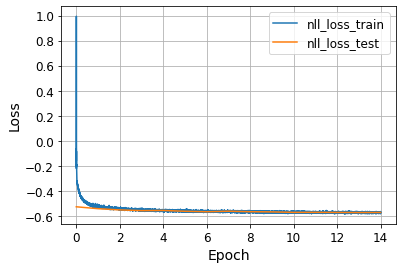

In [66]:
# train
train_losses, test_losses = train_model(
    model, train_loader, test_loader, epochs=EPOCHS, lr=LR, loss_key='nll_loss', use_cuda=USE_CUDA, use_tqdm=True
)
plot_training_curves(train_losses, test_losses)

In [67]:
test_losses['nll_loss'][-1]

-0.5718963866233826

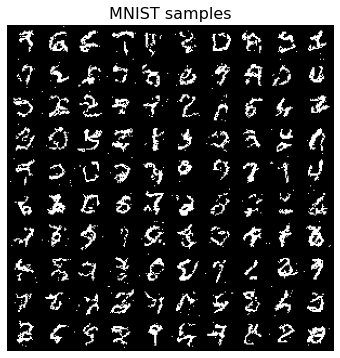

In [68]:
samples = model.sample(100)
show_samples(samples, 'MNIST samples')